**Task 1: Random Forest Classification**

*Random Forest Classifier:* An ensemble learning method that constructs multiple decision trees and merges them together to improve classification accuracy and control overfitting.

*Hyperparameter Tuning:* The process of optimizing the parameters of a machine learning algorithm to enhance its performance on unseen data.
*GridSearchCV:* A method in scikit-learn used for exhaustive searching over specified parameter values for an estimator using cross-validation to find the best hyperparameters.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

print(df.head())

X = df.drop('quality', axis=1)
y = df['quality']  #(wine quality)

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Set up hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Create Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

*GridSearchCV* is used to systematically test different combinations of hyperparameters (n_estimators, max_depth, and criterion) to find the best-performing Random Forest model based on accuracy during cross-validation.

*Data Display:* Shows the first five entries of the dataset, giving insights into the features used for classification.

*Best Parameters:* Indicates the optimal hyperparameters for the Random Forest model that resulted in the best performance.



*Accuracy* reflects the overall correctness of the model's predictions.

*Precision* indicates the reliability of the positive predictions.

*Recall* reflects the model's ability to identify all relevant instances.

*F1-Score:* the harmonic mean of precision and recall, providing a balance between the two.

*ROC:* plots the true positive rate (sensitivity) against the false positive rate at various threshold settings.

 *AUC:* score quantifies the overall ability of the model to discriminate between the positive and negative classes.

**Task 2: Gradient Boosting**

*Gradient Boosting:* An ensemble machine learning technique that builds models in a sequential manner, where each new model corrects errors made by previously trained models, typically using decision trees.

*GradientBoostingRegressor:* A specific implementation of gradient boosting for regression tasks, designed to minimize the loss function using gradient descent.

In [6]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.read_csv(url, sep='\s+', header=None, names=column_names)

print(df.head())

X = df.drop('MEDV', axis=1)
y = df['MEDV']  # (median value of owner-occupied homes in $1000s)

gb_regressor = GradientBoostingRegressor(random_state=42)
mse_scores = cross_val_score(gb_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(gb_regressor, X, y, cv=5, scoring='r2')
mse_scores = -mse_scores

# Report the mean squared error (MSE) and R² scores for each fold
for i in range(len(mse_scores)):
    print(f"Fold {i+1} - MSE: {mse_scores[i]:.4f}, R²: {r2_scores[i]:.4f}")
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)
print(f"\nMean MSE across all folds: {mean_mse:.4f}")
print(f"Mean R² across all folds: {mean_r2:.4f}")


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Fold 1 - MSE: 7.4841, R²: 0.7833
Fold 2 - MSE: 13.5670, R²: 0.8510
Fold 3 - MSE: 19.2557, R²: 0.7596
Fold 4 - MSE: 37.2483, R²: 0.5753
Fold 5 - MSE: 15.8553, R²: 0.4037

Mean MSE across all folds: 18.6821
Mean R² across all folds: 0.6746


**Task 3: XGBoost Classification**

*XGBoost:* An optimized gradient boosting algorithm that is efficient and scalable, particularly well-suited for classification tasks.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

X = df.drop('quality', axis=1)
y = df['quality']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)

xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=0)

print("Random Forest Model Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")

print("\nXGBoost Model Metrics:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")

if accuracy_rf > accuracy_xgb:
    print("\nRandom Forest performs better than XGBoost based on accuracy.")
elif accuracy_rf < accuracy_xgb:
    print("\nXGBoost performs better than Random Forest based on accuracy.")
else:
    print("\nBoth models perform equally based on accuracy.")


Random Forest Model Metrics:
Accuracy: 0.68125
Precision: 0.6598279800872886
Recall: 0.68125

XGBoost Model Metrics:
Accuracy: 0.6625
Precision: 0.6587162388116392
Recall: 0.6625

Random Forest performs better than XGBoost based on accuracy.


**Task 4: Model Evaluation Metrics**

Accuracy reflects the overall correctness of the model's predictions.

Precision indicates the reliability of the positive predictions.

Recall reflects the model's ability to identify all relevant instances.

F1-Score: the harmonic mean of precision and recall, providing a balance between the two.

ROC: plots the true positive rate (sensitivity) against the false positive rate at various threshold settings.

AUC: score quantifies the overall ability of the model to discriminate between the positive and negative classes.

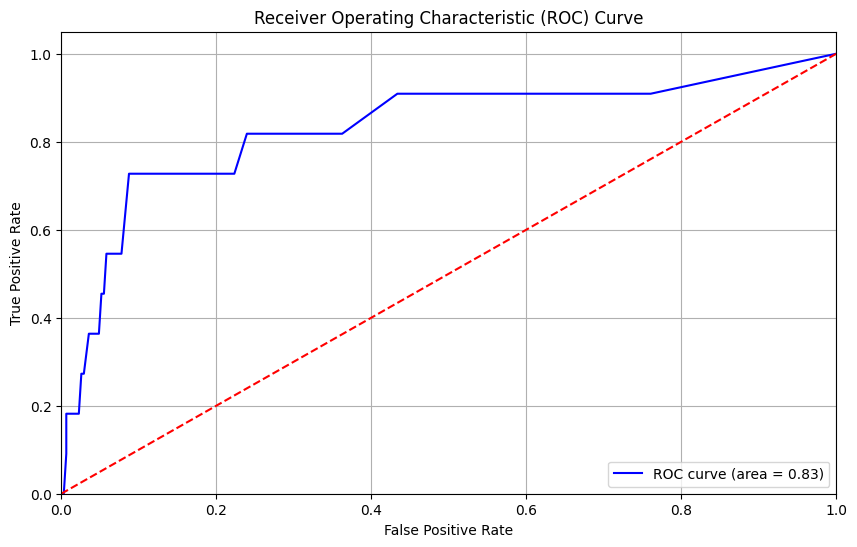

AUC Score: 0.8318623124448368


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

X = df.drop('quality', axis=1)
y = df['quality']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Random Forest Classifier
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"AUC Score: {roc_auc}")


Red Dashed Diagonal Line: Represents the line of no discrimination. It indicates a model that makes random predictions, where the true positive rate (TPR) equals the false positive rate (FPR). A model that performs along this line has no ability to distinguish between the positive and negative classes.

Blue Curve: Represents the performance of the classifier being evaluated. The area under this curve (AUC) quantifies the model's ability to discriminate between the positive and negative classes. A curve that is closer to the top left corner indicates better performance, as it achieves higher true positive rates with lower false positive rates.

**Task 5: K-Means Clustering**

*K-Means Clustering:* The algorithm is applied for a range of cluster numbers (K=2 to K=10). For each K, the inertia (sum of squared distances of samples to their closest cluster center) is calculated, and the silhouette score is computed to evaluate the clustering quality.

*Elbow Curve:* The first subplot shows the Elbow method graph, which helps to visualize the inertia as K varies. The "elbow point" suggests the optimal number of clusters.

*Silhouette Score: *The second subplot displays the silhouette scores for different K values, allowing identification of the K with the highest silhouette score as the optimal number of clusters.

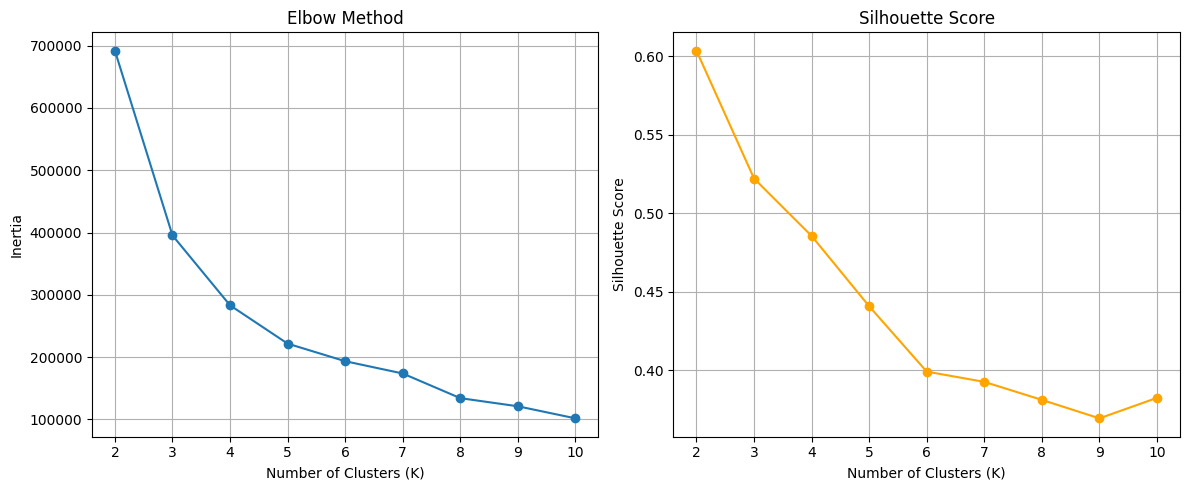

Optimal number of clusters (K): 2


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
X = df.drop('quality', axis=1)

# Lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

# Apply K-Means clustering for K values from 2 to 10
K_values = range(2, 11)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Store inertia for the Elbow Method
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_values)
plt.grid()

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_values)
plt.grid()

plt.tight_layout()
plt.show()

# Optimal K
optimal_k = K_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters (K): {optimal_k}')


*Elbow Method Graph:*

The x-axis represents the number of clusters (K) ranging from 2 to 10.
The y-axis shows the inertia, which is the sum of squared distances from each point to its assigned cluster center.
The "elbow" point on the graph indicates a suitable value for K, where adding more clusters results in diminishing returns regarding inertia reduction.

*Silhouette Score Graph:*

The x-axis also represents the number of clusters (K) from 2 to 10.
The y-axis displays the silhouette score, which measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.
The optimal K corresponds to the highest silhouette score.

**Task 6: DBSCAN Clustering**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

A density-based clustering algorithm that groups together points that are closely packed together, marking as outliers the points that lie alone in low-density regions.

Hyperparameters:

eps (epsilon): The maximum distance between two samples for one to be considered as in the neighborhood of the other. It defines the radius of the neighborhood around a point.

min_samples: The minimum number of points required to form a dense region. It helps determine whether a point is a core point, border point, or noise.

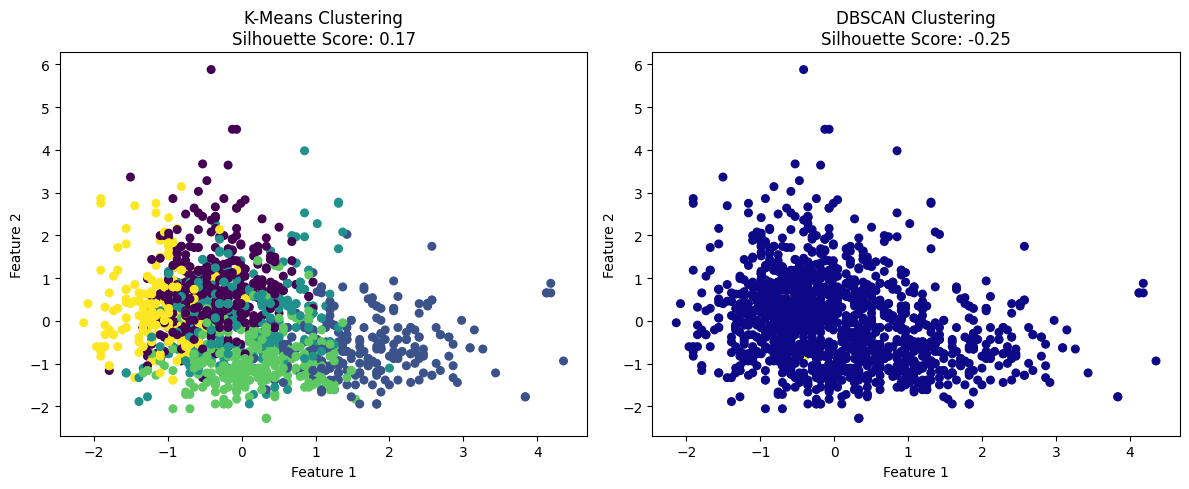

K-Means Silhouette Score: 0.17
DBSCAN Silhouette Score: -0.25


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
X = df.drop('quality', axis=1)

X_scaled = StandardScaler().fit_transform(X) # For better clustering performance

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can tune these hyperparameters
dbscan_labels = dbscan.fit_predict(X_scaled)

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# Plot K-Means clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=30)
plt.title(f'K-Means Clustering\nSilhouette Score: {kmeans_silhouette:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='plasma', marker='o', s=30)
plt.title(f'DBSCAN Clustering\nSilhouette Score: {dbscan_silhouette:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')


K-Means demonstrates the ability to form multiple distinct clusters, albeit with some overlap, as indicated by the moderate silhouette score.

DBSCAN shows less differentiation among points, leading to a negative silhouette score, which highlights the challenges in defining clusters in datasets with varying density and noise levels.

The clustering results from DBSCAN may show different shapes and distributions compared to K-Means, especially if the data is not spherical or contains noise. The choice between K-Means and DBSCAN should depend on the specific characteristics of the dataset and the clustering objectives.

*Task 7: Clustering Evaluation*

The Silhouette Score is a metric used to evaluate the quality of clustering in a dataset. It provides a measure of how similar an object is to its own cluster compared to other clusters.

K-Means has a positive Silhouette Score of 0.17, indicating that its clustering results are relatively better compared to DBSCAN.

DBSCAN, on the other hand, has a negative Silhouette Score of -0.25. This indicates poor clustering quality, suggesting that the majority of points are either misclassified or inadequately grouped, resulting in many points being closer to points in other clusters rather than their assigned clusters.